In [1]:
#importing the necessary libraries for EDA 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Train.csv')
td = pd.read_csv('Test.csv')

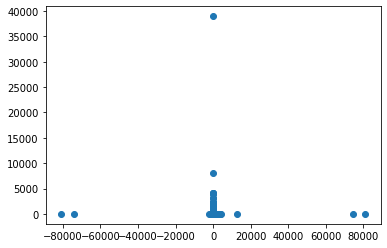

In [4]:
plt.scatter(df['Quantity'], df['UnitPrice'])
plt.show()

[Text(0, 0.5, 'UnitPrice'), Text(0.5, 0, 'InvoiceNo')]

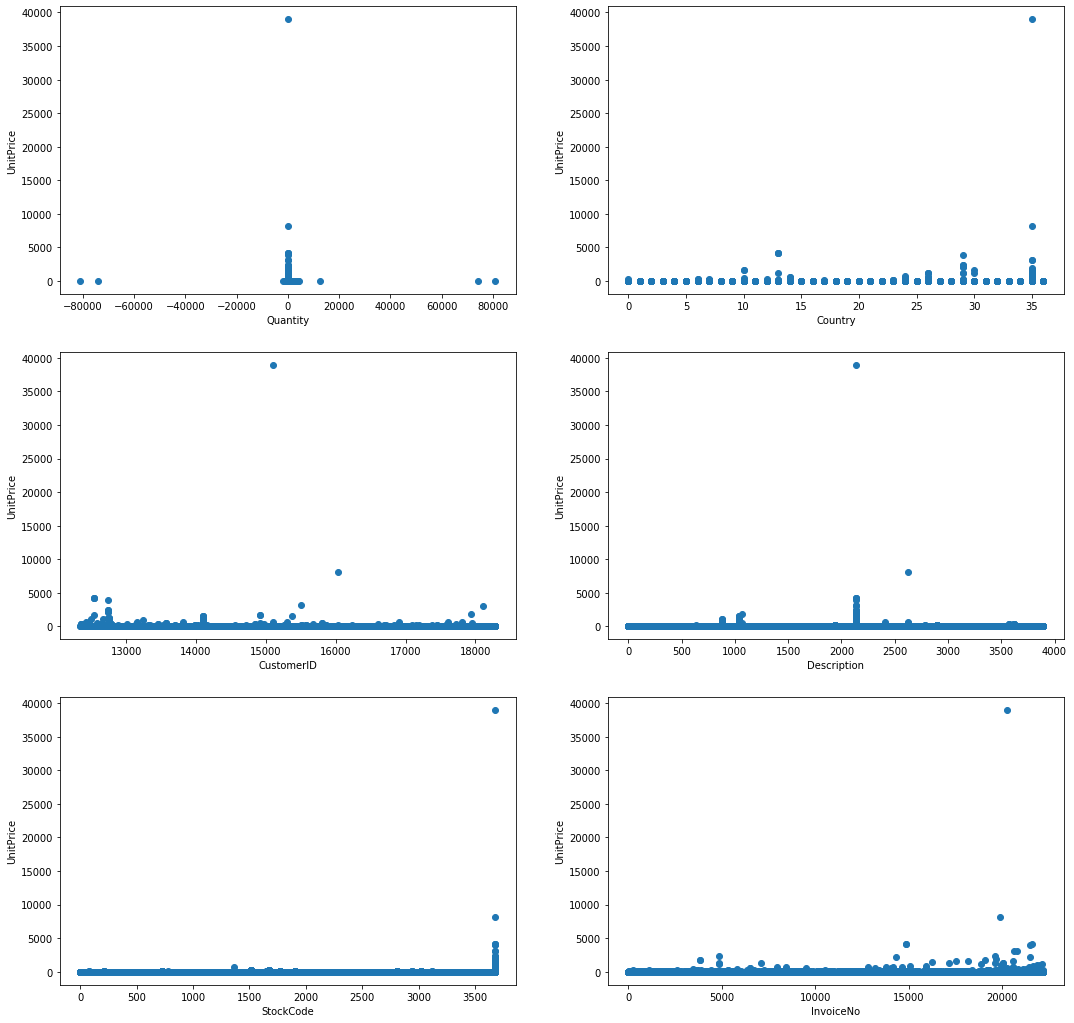

In [5]:
#Lets plot the relation between the features and the target variable 
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 18))
ax[0][0].scatter(df['Quantity'], df['UnitPrice'])
ax[0][0].set(xlabel = 'Quantity', ylabel = 'UnitPrice')
ax[0][1].scatter(df['Country'], df['UnitPrice'])
ax[0][1].set(xlabel = 'Country', ylabel = 'UnitPrice')
ax[1][0].scatter(df['CustomerID'], df['UnitPrice'])
ax[1][0].set(xlabel = 'CustomerID', ylabel = 'UnitPrice')
ax[1][1].scatter(df['Description'], df['UnitPrice'])
ax[1][1].set(xlabel = 'Description', ylabel = 'UnitPrice')
ax[2][0].scatter(df['StockCode'], df['UnitPrice'])
ax[2][0].set(xlabel = 'StockCode', ylabel = 'UnitPrice')
ax[2][1].scatter(df['InvoiceNo'], df['UnitPrice'])
ax[2][1].set(xlabel = 'InvoiceNo', ylabel = 'UnitPrice')

In [6]:
#As we can observe there are some outliers in the Quantity as well as in the UnitPrice
#So we will find them and drop them in order to increase the efficiency of our model
outliers = df[(df['Quantity'] < -20000) | (df['Quantity'] > 20000) | (df['UnitPrice'] > 5000)]
outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
140723,20237,3681,2140,-1,2011-06-10 15:31:00,38970.00,15098.0,35
141379,1909,2001,2002,74215,2011-01-18 10:01:00,1.04,12346.0,35
180978,22185,2403,2329,-80995,2011-12-09 09:27:00,2.08,16446.0,35
210734,18503,2403,2329,80995,2011-12-09 09:15:00,2.08,16446.0,35
239556,19848,3683,2624,-1,2011-05-03 12:51:00,8142.75,16029.0,35
271013,18958,2001,2002,-74215,2011-01-18 10:17:00,1.04,12346.0,35


In [7]:
#Lets drop the outliers that we found out above 
df.drop(df[df['Quantity'] < -20000].index, inplace = True) 
df.drop(df[df['UnitPrice'] > 20000].index, inplace = True)
df.drop(df[df['UnitPrice'] > 5000].index, inplace = True) 

In [16]:
features = ['InvoiceNo','StockCode','Description','Quantity','CustomerID', 'Country']
x_train = pd.get_dummies(df[features])
x_train.dropna()
x_train

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country
0,6141,1583,144,3,14056.0,35
1,6349,1300,3682,6,13098.0,35
2,16783,2178,1939,4,15044.0,35
3,16971,2115,2983,1,15525.0,35
4,6080,1210,2886,12,13952.0,35
...,...,...,...,...,...,...
284775,3408,1706,1081,6,17965.0,35
284776,13982,2184,2947,16,16793.0,35
284777,6641,667,3632,4,14755.0,35
284778,13820,1576,3089,48,14866.0,35


In [17]:
y_train = df['UnitPrice']
y_train.dropna()

0         3.75
1         1.95
2         5.95
3         0.83
4         1.65
          ... 
284775    1.65
284776    0.65
284777    8.50
284778    3.45
284779    0.75
Name: UnitPrice, Length: 284776, dtype: float64

In [18]:
x_test = pd.get_dummies(td[features])
x_test.dropna()
x_test

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country
0,3139,1709,1079,3,16161.0,35
1,617,510,3457,1,17341.0,35
2,14653,604,694,36,15158.0,35
3,8634,1478,3473,2,16033.0,35
4,15546,3216,871,1,15351.0,35
...,...,...,...,...,...,...
122044,7813,2487,1289,12,15214.0,35
122045,8694,3069,217,16,16200.0,35
122046,915,1419,3474,6,15555.0,35
122047,8156,1631,1434,1,15907.0,35


In [23]:
#After using various models I got the best result with the Random Forest 
#the result may be improved by hypertuning the parameters
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 250)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
y_pred = model.predict(x_test)

In [25]:
my_submission = pd.DataFrame({'UnitPrice': y_pred})
my_submission.to_csv('sub7.csv', index = False)